In [0]:
import os
from urllib import request
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python import debug as tf_debug

%matplotlib inline

In [0]:
data_directory = '/tmp'
model_directory = '/afs/dogscats/run1'

if not os.path.isdir(model_directory):
    os.makedirs(model_directory)

In [0]:
def get_data(local_data_root: str, is_chief: bool=True):
    data_dir = os.path.join(local_data_root, 'datasets/dogscats')
    
    if is_chief:
        if not os.path.isdir(data_dir):
            # Download the data zip to our data directory and extract
            fallback_url = 'http://files.fast.ai/data/dogscats.zip'
            tf.keras.utils.get_file(
                os.path.join('/tmp', os.path.basename(fallback_url)), 
                fallback_url, 
                cache_dir='/tmp',
                extract=True)
        
    return data_dir

In [0]:
data_dir = get_data(data_directory, True)

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os 
import cv2
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import pandas as pd

In [0]:
def organize_datasets(path_to_data, n=4000, ratio=0.2):
    files = os.listdir(path_to_data)
    files = [os.path.join(path_to_data, f) for f in files]
    shuffle(files)
    files = files[:n]
    
    n = int(len(files) * ratio)
    val, train = files[:n], files[n:]
    

    shutil.rmtree('./data/')
    print('/data/ removed')

    for c in ['dogs', 'cats']: 
        os.makedirs('./data/train/{0}/'.format(c))
        os.makedirs('./data/validation/{0}/'.format(c))

    print('folders created !')

    for t in tqdm_notebook(train):
        if 'cat' in t:
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'cats'))
        else:
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'dogs'))
     
    for v in tqdm_notebook(val):
        if 'cat' in v:
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'cats'))
        else:
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'dogs'))
            
    print('Data copied!')

In [16]:
!pip install keras-tqdm
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback

In [0]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )
val_datagen = ImageDataGenerator(rescale=1/255.)

In [18]:
train_generator = train_datagen.flow_from_directory(
        './data/validation/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        '/afs/dogscats/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

FileNotFoundError: ignored

In [0]:
os.listdir(data_dir)

['train', 'models', 'sample', 'test1', 'valid']

In [0]:
os.listdir(os.path.join(data_dir, 'valid'))

['dogs', 'cats']

In [0]:
cats = os.listdir(os.path.join(data_dir, 'valid', 'cats'))[:5]
cats

['cat.8587.jpg',
 'cat.1278.jpg',
 'cat.1721.jpg',
 'cat.11045.jpg',
 'cat.4309.jpg']

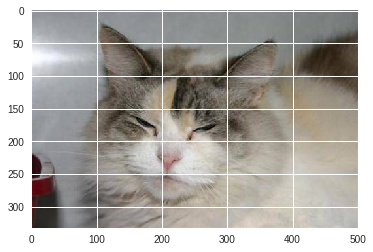

In [0]:
img = plt.imread(os.path.join(data_dir, 'valid', 'cats', cats[0]))
plt.imshow(img)

In [0]:
img.shape

(333, 500, 3)

In [0]:
dogs = os.listdir(os.path.join(data_dir, 'valid', 'dogs'))[:5]
dogs

['dog.3116.jpg',
 'dog.10018.jpg',
 'dog.9675.jpg',
 'dog.5724.jpg',
 'dog.978.jpg']

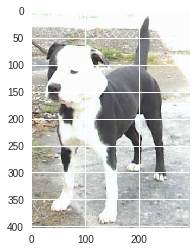

In [0]:
img = plt.imread(os.path.join(data_dir, 'valid', 'dogs', dogs[0]))
plt.imshow(img)

In [0]:
objeto = os.listdir(os.path.join(data_dir))[:5]
objeto

['train', 'models', 'sample', 'test1', 'valid']

In [0]:
! ls
%cd sample_data
! ls

sample_data
/content/sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation


model = Sequential([
    
    #Create Convolution2d Layer with activation Relu
    Conv2D(32,(3,3),input_shape=(64,64,3)),
    Activation('relu'),
    #Create MaxsPooling2D Function 
    MaxPooling2D(pool_size=(2,2)),
    
    #Create Convolution 2d Layer again 
    Conv2D(32,(3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    #Flatten layer !
    Flatten(),
    
 
    #Full connection
    Dense(units=128),
    Activation('relu'),
    
    
    Dense(units=1),
    Activation('sigmoid'),
       
])


# For a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test1',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Using TensorFlow backend.


FileNotFoundError: ignored